# **Predict Employee Attrition**

### **Dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset**

In [62]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import lime

## **1. Perform Exploratory Data Analysis (EDA) to identify key factors influencing attrition.** 

In [ ]:
df= pd.read_csv('HR-Employee-Attrition.csv') # Load the dataset
df.head() # Display the first few rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print('Shape of Dataset:',df.shape) # Check the shape of the dataset
print('Datatype of each column\n',df.dtypes) # Check the datatype of each column
print('Missing Values:',df.isnull().sum()) # Check for missing values
df['Attrition'].value_counts() # Count the number of employees who left and stayed

Shape of Dataset: (1470, 35)
Datatype of each column
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
S

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [ ]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1) # Drop unnecessary columns

le = LabelEncoder() # Initialize LabelEncoder
# Convert categorical variables to numerical
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes=1, No=0
df['Gender'] = le.fit_transform(df['Gender'])        # Male=1, Female=0
df['OverTime'] = le.fit_transform(df['OverTime'])    # Yes=1, No=0

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'] # List of categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # Convert categorical variables to dummy/indicator variables

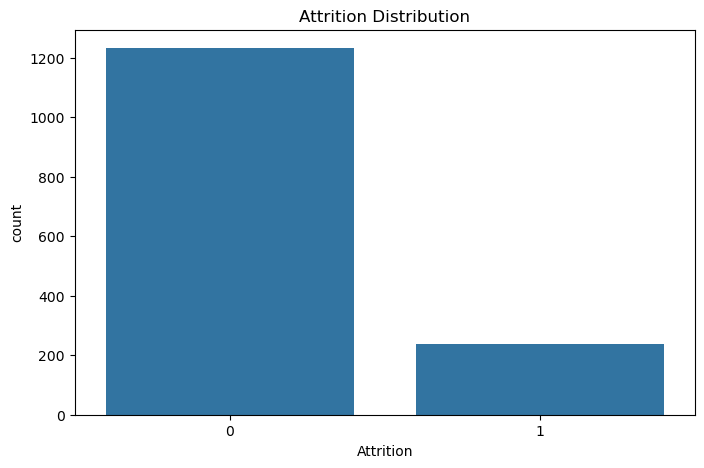

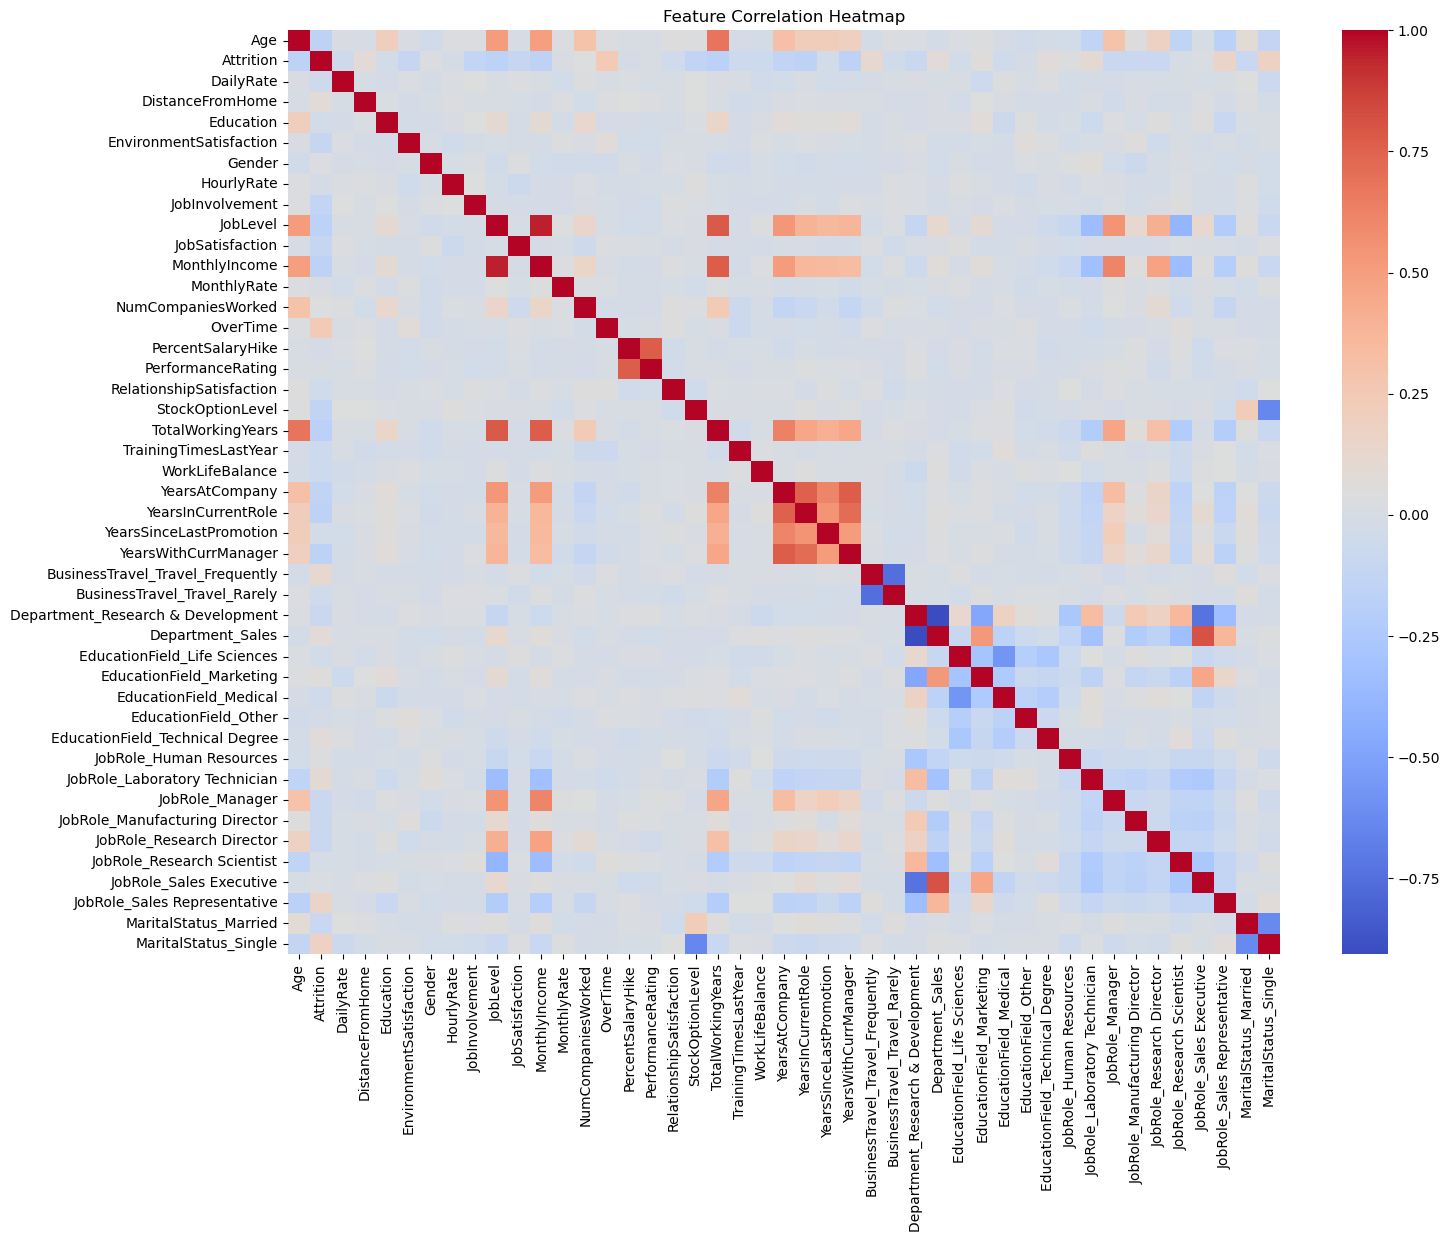

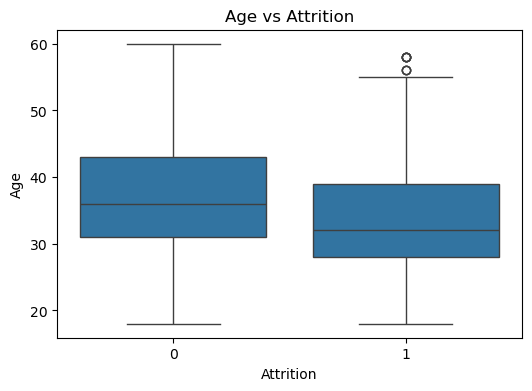

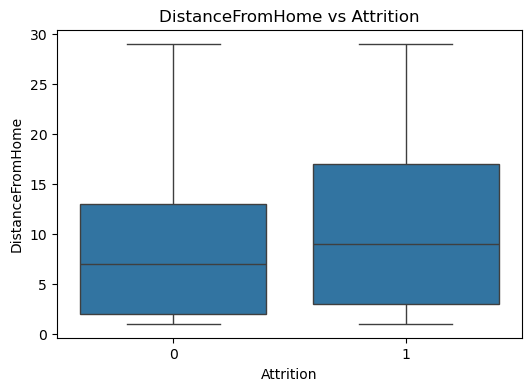

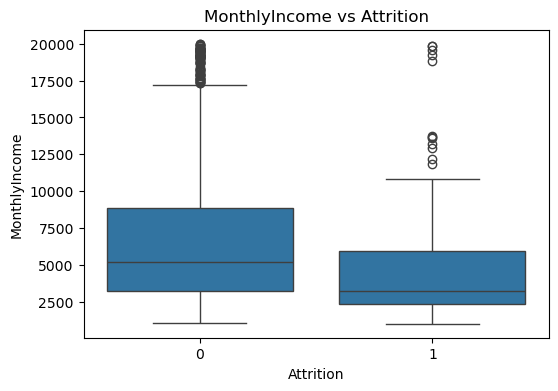

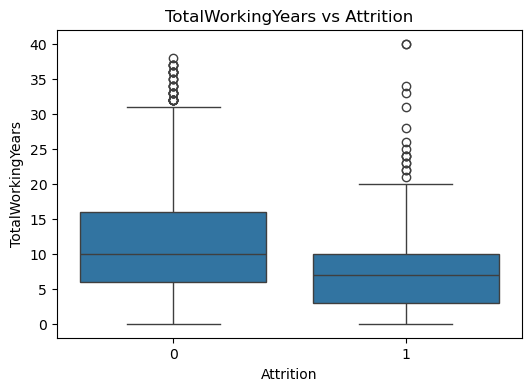

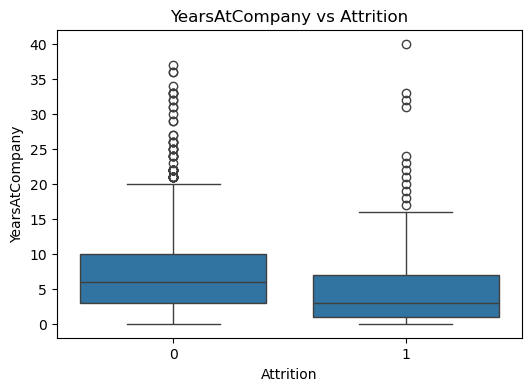

In [64]:
# 📊 5. EDA: Visualizations
plt.figure(figsize=(8,5))
sns.countplot(x='Attrition', data=df)
plt.savefig("attrition_distribution.png") 
plt.title("Attrition Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

# Boxplots for numerical features
num_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Attrition', y=feature, data=df)
    plt.title(f'{feature} vs Attrition')
    plt.savefig(f"{feature}_vs_attrition.png")    
    plt.show()

In [52]:
# 🎯 7. Split Dataset for Modeling
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [55]:
# 🧠 8. Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Evaluate model
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

[[237  10]
 [ 31  16]]


In [ ]:
# 📌 9. LIME Explanation
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X.columns,
    class_names=['No Attrition', 'Attrition'],
    mode='classification'
)

i = 5 
exp = explainer.explain_instance(X_test[i], log_model.predict_proba) # Explain the prediction for the 5th instance
exp.show_in_notebook(show_table=True) # Display the explanation


# Save the model and scaler
joblib.dump(log_model, 'logistic_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Insights
print("\nActionable Insights:\n")
print("1. High Attrition is linked with:\n   - Overtime\n   - Low Monthly Income\n   - Long Distance from Home\n   - Short Company Tenure\n   - Low Job Satisfaction")
print("2. HR Recommendations:\n   - Offer flexible hours or remote work\n   - Regular salary reviews\n   - Better onboarding & mentorship\n   - Prioritize work-life balance\n   - Conduct satisfaction surveys")


Actionable Insights:

1. High Attrition is linked with:
   - Overtime
   - Low Monthly Income
   - Long Distance from Home
   - Short Company Tenure
   - Low Job Satisfaction
2. HR Recommendations:
   - Offer flexible hours or remote work
   - Regular salary reviews
   - Better onboarding & mentorship
   - Prioritize work-life balance
   - Conduct satisfaction surveys


# **📘 Project Summary: Employee Attrition Prediction Using Logistic Regression**

This notebook presents a complete end-to-end machine learning workflow for predicting employee attrition using the IBM HR Analytics dataset. Here's a breakdown of what we have achieved:

---

## **📥 1. Data Loading and Inspection**

We began by importing the dataset (`HR-Employee-Attrition.csv`) into a pandas DataFrame and explored its basic properties:
- Displayed the first few rows
- Checked the shape and data types
- Verified missing values (none were found)
- Observed the distribution of the target variable `Attrition`

---

## **🧹 2. Data Preprocessing**

To clean and prepare the data:
- Dropped non-informative or constant columns: `EmployeeCount`, `EmployeeNumber`, `Over18`, `StandardHours`
- Encoded binary categorical variables (`Attrition`, `Gender`, `OverTime`) using `LabelEncoder`
- Applied one-hot encoding to categorical columns like `JobRole`, `BusinessTravel`, etc., to make them suitable for modeling

---

## **📊 3. Exploratory Data Analysis (EDA)**

We performed visual analysis to understand attrition behavior:
- Countplot to visualize class imbalance in the `Attrition` column
- Correlation heatmap to identify potential feature relationships
- Boxplots to explore how numerical features like `Age`, `MonthlyIncome`, `YearsAtCompany` relate to attrition

**Key Observations:**
- Employees who leave tend to have lower income, fewer years at the company, and more overtime.
- Attrition correlates negatively with job satisfaction and total working years.

---

## **📦 4. Feature Scaling and Dataset Splitting**

We:
- Scaled features using `StandardScaler` to normalize the data.
- Split the dataset into training (80%) and testing (20%) sets using `train_test_split` with stratification to maintain class balance.

---

## **🤖 5. Model Training - Logistic Regression**

We trained a `LogisticRegression` model on the scaled training data:
- Chosen for its simplicity and interpretability in binary classification
- Achieved reasonable performance on the test data

Model evaluation included:
- `classification_report` showing precision, recall, and F1-score
- `confusion_matrix` to visualize prediction accuracy

---

## **🧠 6. Model Interpretability with LIME**

To understand **why** the model makes certain predictions:
- We used **LIME (Local Interpretable Model-Agnostic Explanations)** to explain a specific prediction on the test set
- LIME shows which features contribute the most to an employee being predicted as likely to leave or stay

---

## **💾 7. Model Saving**

To enable future use of the trained model:
- Saved both the `LogisticRegression` model and the `StandardScaler` using `joblib`

---

## **💡 8. Actionable Insights for HR**

From our analysis and model, we recommend the following:

### **Key Drivers of Attrition:**
- **OverTime** work
- **Low Monthly Income**
- **Long Distance From Home**
- **Low Job Satisfaction**
- **Short Tenure at Company**

### **Recommendations:**
- Promote a better **work-life balance** and consider **flexible work arrangements**
- Review and improve **compensation plans**
- Provide **career growth opportunities** and recognize performance
- Encourage feedback through **satisfaction surveys**
- Focus on **retention strategies** for new hires and those with less than 3 years at the company

---

## **✅ Final Outcome**

We successfully:
- Preprocessed and analyzed the HR dataset
- Trained and evaluated a logistic regression model to predict attrition
- Interpreted model predictions using LIME
- Delivered data-driven retention strategies for HR teams

This project showcases the power of machine learning to drive actionable business insights from organizational data.